## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
#Import statements for required libraries and dependencies uploaded
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
#here, we are reading the bitstamp.csv file to make the bitstamp_df dataframe with variables index_col, parse_dates, and infer_daytime_format
bitstamp_df = bitstamp_dataframe = pd.read_csv(
    Path('./Resources/bitstamp.csv'),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True
)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
#previews first 5 rows of data
bitstamp_df.head() 

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
#here, we are reading the coinbase.csv file to make the coinbase_df dataframe with variables index_col, parse_dates, and infer_daytime_format
coinbase_df = coinbase_dataframe = pd.read_csv(
    Path('./Resources/coinbase.csv'),
    index_col = "Timestamp",
    parse_dates = True,
    infer_datetime_format = True
)  


In [5]:
#previews first 5 rows of data
coinbase_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
#checks total number of NaN values, drops them, then checks again for 0
bitstamp_df.isnull().sum() 
bitstamp_df = bitstamp_df.dropna() 
bitstamp_df.isnull().sum() 

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [7]:
#using .loc function to locate 'Close' column then replacing the '$' string with nothing using str.replace function
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$", "") 
bitstamp_df.head() 

C:\Users\ferre\AppData\Local\Temp/ipykernel_2732/1885001481.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].str.replace("$", "")
C:\Users\ferre\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.0,1.069665,14582.660932,13632.923329


### Step 3: Convert the data type of the Close column to a `float`.

In [8]:
#using .loc function to locate 'Close' column then replacing the string with float using the .astype function 
bitstamp_df.loc[:, "Close"] = bitstamp_df.loc[:, "Close"].astype("float") 
bitstamp_df.head() 

C:\Users\ferre\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [9]:
#checks for total number of duplicated values, drops duplicates, then checks again using duplicated().sum() and drop_duplicates() functions
bitstamp_df.duplicated().sum() 
bitstamp_df = bitstamp_df.drop_duplicates()
bitstamp_df.duplicated().sum() 


0

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [10]:
#checks total number of NaN values, drops them, then checks again for 0
coinbase_df.isnull().sum()
coinbase_df = coinbase_df.dropna() 
coinbase_df.isnull().sum() 

Open              0
High              0
Low               0
Close             0
BTC Volume        0
USD Volume        0
Weighted Price    0
dtype: int64

In [11]:
#using .loc function to locate 'Close' column then replacing the '$' string with nothing using str.replace function
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$", "")
coinbase_df.head() 

C:\Users\ferre\AppData\Local\Temp/ipykernel_2732/2740377894.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].str.replace("$", "")
C:\Users\ferre\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [12]:
#using .loc function to locate 'Close' column then replacing the string with float using the .astype function 
coinbase_df.loc[:, "Close"] = coinbase_df.loc[:, "Close"].astype("float") 
coinbase_df.head() 

C:\Users\ferre\anaconda3\lib\site-packages\pandas\core\indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.26944,13574.719401


In [13]:
#checks for total number of duplicated values, drops duplicates, then checks again using duplicated().sum() and drop_duplicates() functions
coinbase_df.duplicated().sum() 
coinbase_df = coinbase_df.drop_duplicates()
coinbase_df.duplicated().sum() 

0

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [14]:
# using .iloc function to create a slice of the close prices
bitstamp_sliced = bitstamp_df.iloc[:, [3]] 
bitstamp_sliced

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00
...,...
2018-03-31 23:55:00,6922.56
2018-03-31 23:56:00,6920.32
2018-03-31 23:57:00,6934.72


In [15]:
# using .iloc function to create a slice of the close prices
coinbase_sliced = coinbase_df.iloc[:, [3]] 
coinbase_sliced

,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44
...,...
2018-03-31 23:55:00,6930.00
2018-03-31 23:56:00,6930.01
2018-03-31 23:57:00,6933.91


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [16]:
# using describe() function with include='all' to generate summary statisitics
bitstamp_sliced.describe(include='all') 

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [17]:
# using describe() function with include='all' to generate summary statisitics
coinbase_sliced.describe(include='all') 

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Prices'}, xlabel='Timestamp'>

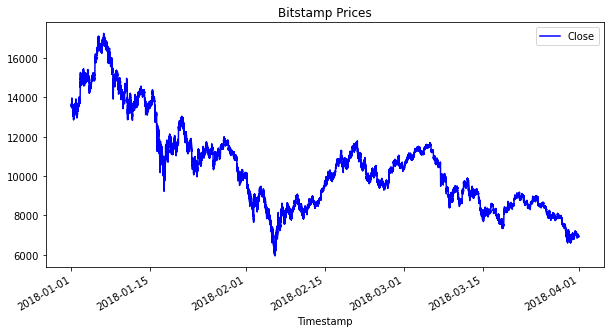

In [18]:
# plotting full duration of bitstamp_sliced with parameters figsize, title, and color with the .plot function

bitstamp_sliced.plot(figsize = (10, 5), title = "Bitstamp Prices", color = "blue") 

<AxesSubplot:title={'center':'Coinbase Prices'}, xlabel='Timestamp'>

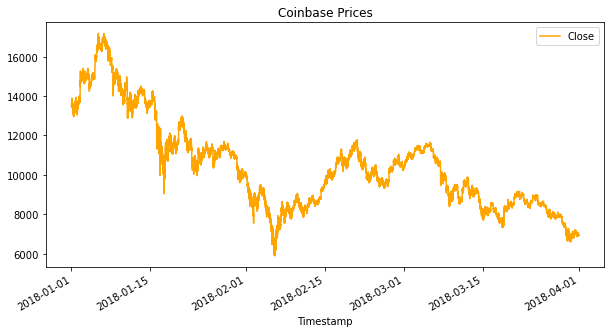

In [19]:
# exact format as above except using coinbase_sliced
coinbase_sliced.plot(figsize = (10,5), title = "Coinbase Prices", color = "orange") 

<AxesSubplot:title={'center':'Bitstamp V. Coinbase Prices'}, xlabel='Timestamp'>

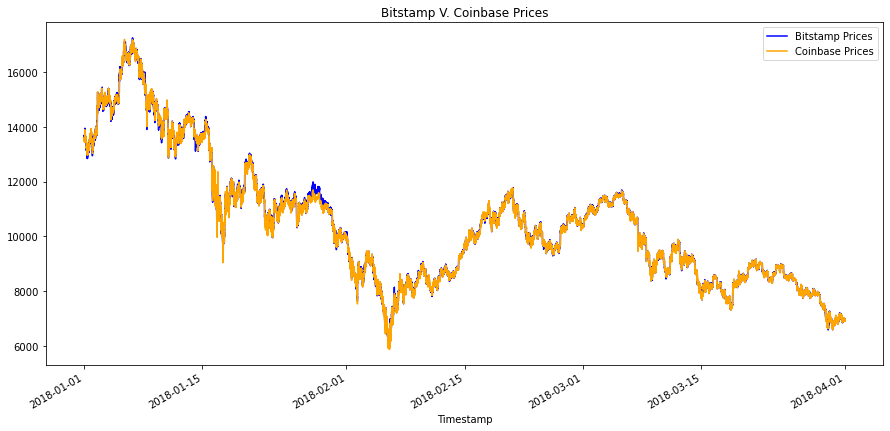

In [20]:
# we are creating two overlayed plots for the full duration here. We first plot the 'Close' values from bitstamp_sliced with parameters legend, figsize, title, color, and label. The plot for coinbase_sliced will 
# only include lengend, figsize, color, and label parameters. Legend and figsize is the same for both, with a custom plot title, specific colors, and specific labels.
bitstamp_sliced['Close'].plot(legend = True, figsize = (15,7), title = "Bitstamp V. Coinbase Prices", color = "blue", label = "Bitstamp Prices") 
coinbase_sliced['Close'].plot(legend = True, figsize = (15,7), color = "orange", label = "Coinbase Prices")

<AxesSubplot:title={'center':'January 2018 Prices: Bitstamp v. Coinbase'}, xlabel='Timestamp'>

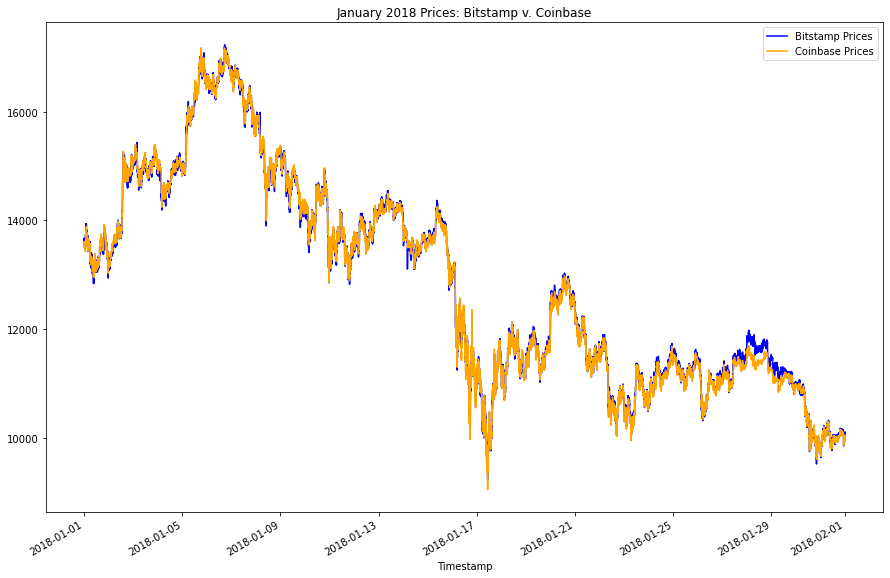

In [21]:
# This section of code is similar to above, except we are using the .loc function with each sliced dataframe to pull out a specific month from the beginning.
bitstamp_sliced['Close'].loc['2018-01-01' : '2018-01-31'].plot(legend = True, figsize = (15,10), title = "January 2018 Prices: Bitstamp v. Coinbase", color = "blue", label = "Bitstamp Prices")
coinbase_sliced['Close'].loc['2018-01-01' : '2018-01-31'].plot(legend = True, figsize = (15,10), color = "orange", label = "Coinbase Prices") 

<AxesSubplot:title={'center':'March 2018 Prices: Bitstamp v. Coinbase'}, xlabel='Timestamp'>

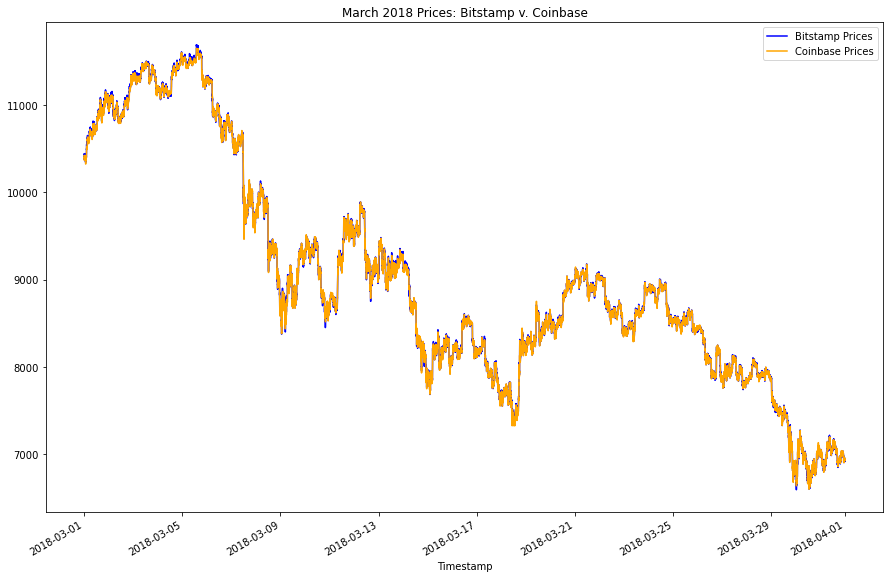

In [22]:
# same as above except with a later month
bitstamp_sliced['Close'].loc['2018-03-01' : '2018-03-31'].plot(legend = True, figsize = (15,10), title = "March 2018 Prices: Bitstamp v. Coinbase", color = "blue", label = "Bitstamp Prices")
coinbase_sliced['Close'].loc['2018-03-01' : '2018-03-31'].plot(legend = True, figsize = (15,10), color = "orange", label = "Coinbase Prices") 

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** YOUR ANSWER HERE

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 02, 2018 Prices: Bitstamp v. Coinbase'}, xlabel='Timestamp'>

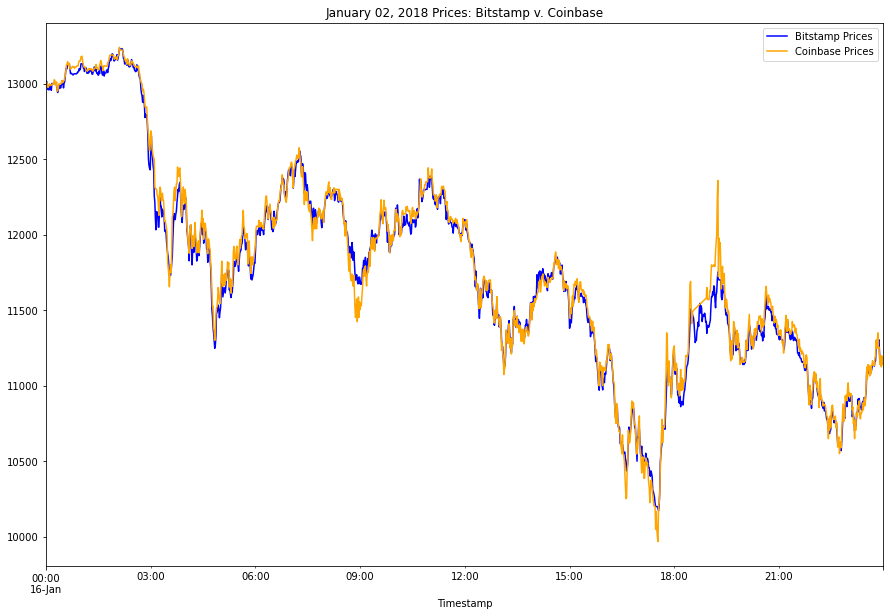

In [76]:
# For this overlay plot, we are using similar formatting to the plots above, however, we will use the .loc unction only on one day from early in the set
bitstamp_sliced['Close'].loc['2018-01-16'].plot(legend = True, figsize = (15,10), title = "January 02, 2018 Prices: Bitstamp v. Coinbase", color = "blue", label = "Bitstamp Prices")
coinbase_sliced['Close'].loc['2018-01-16'].plot(legend = True, figsize = (15,10), color = "orange", label = "Coinbase Prices") 

In [77]:
# we calculate the arbitrage spread from the early date by subtracting the bitstamp_sliced dataframe 
arbitrage_spread_early = coinbase_sliced['Close'].loc['2018-01-16'] - bitstamp_sliced['Close'].loc['2018-01-16'] 
arbitrage_spread_early.describe() 


count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'January 02, 2018 Arbitrage Spread'}>

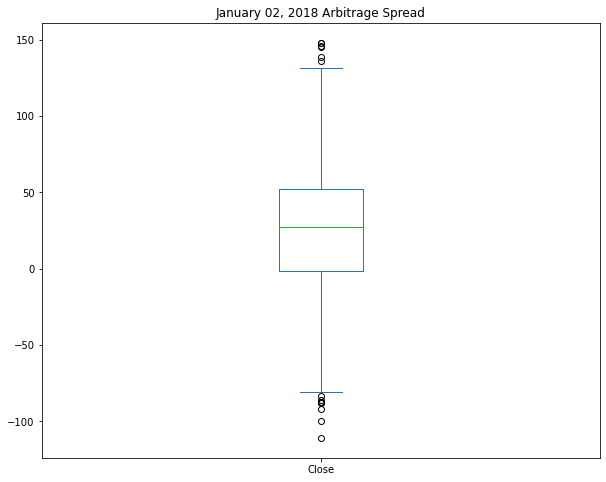

In [25]:
# using the .plot funtion with parameters kind, title, and figsize, we generate a boxplot with kind = 'box' 

arbitrage_spread_early.plot(kind = 'box', title = 'January 02, 2018 Arbitrage Spread', figsize = (10,8)) 

<AxesSubplot:title={'center':'February 02, 2018 Prices: Bitstamp v. Coinbase'}, xlabel='Timestamp'>

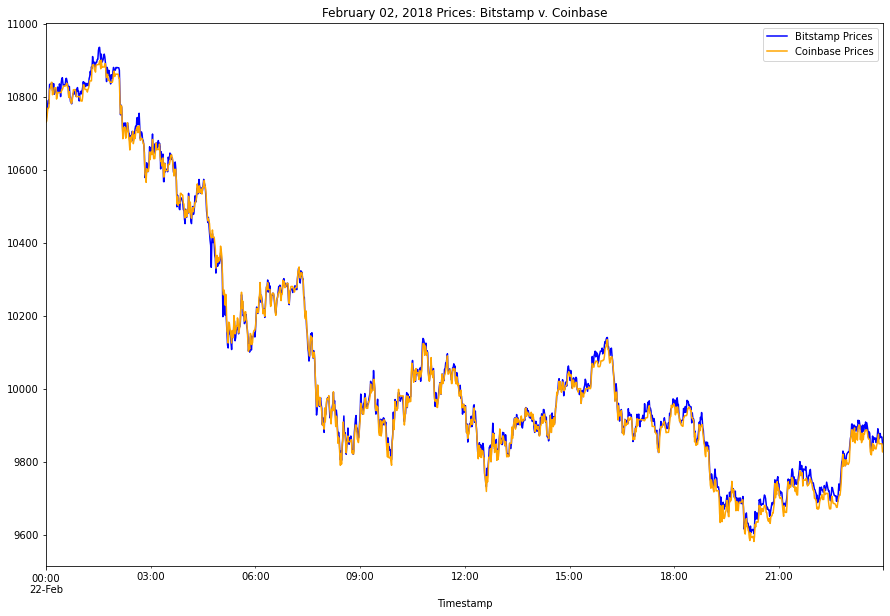

In [190]:
# follows the same process as cell 23 with our middle date this time
bitstamp_sliced['Close'].loc['2018-02-22'].plot(legend = True, figsize = (15,10), title = "February 02, 2018 Prices: Bitstamp v. Coinbase", color = "blue", label = "Bitstamp Prices")
coinbase_sliced['Close'].loc['2018-02-22'].plot(legend = True, figsize = (15,10), color = "orange", label = "Coinbase Prices") 

In [191]:
# same process for arbitrage spread from cell 24
arbitrage_spread_middle = coinbase_sliced['Close'].loc['2018-02-22'] - bitstamp_sliced['Close'].loc['2018-02-22']
arbitrage_spread_middle.describe() 

count    1440.000000
mean       -7.987979
std        13.413677
min       -49.730000
25%       -17.105000
50%        -8.695000
75%         0.415000
max        82.830000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'February 15, 2018 Arbitrage Spread'}>

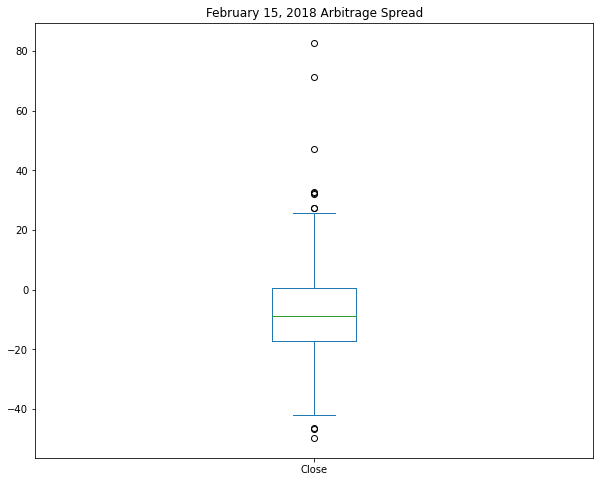

In [192]:
# same process for bloxplot as cell 25 
arbitrage_spread_middle.plot(kind = 'box', title = 'February 15, 2018 Arbitrage Spread', figsize = (10,8)) 

<AxesSubplot:title={'center':'March 22, 2018 Prices: Bitstamp v. Coinbase'}, xlabel='Timestamp'>

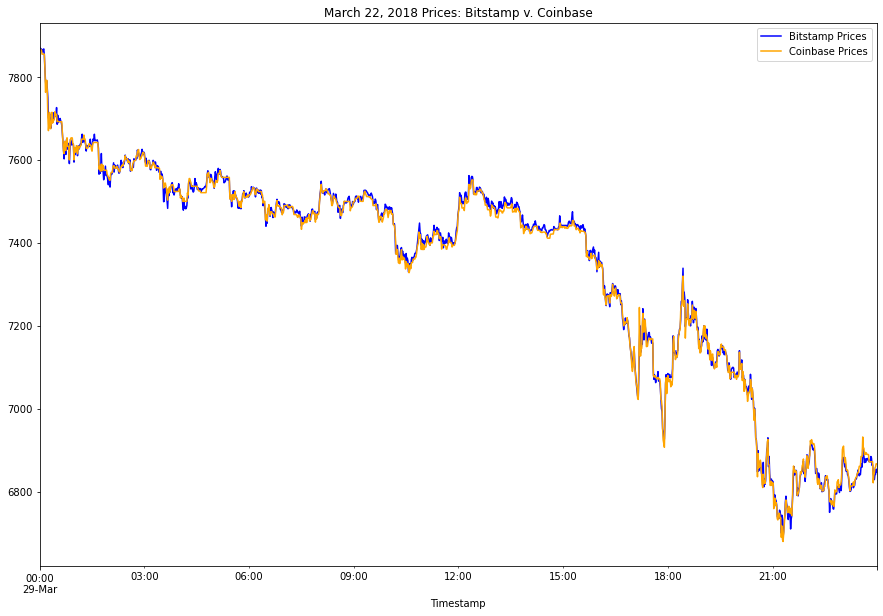

In [147]:
# follows the same process as cell 23 with our late date this time

bitstamp_sliced['Close'].loc['2018-03-29'].plot(legend = True, figsize = (15,10), title = "March 22, 2018 Prices: Bitstamp v. Coinbase", color = "blue", label = "Bitstamp Prices")
coinbase_sliced['Close'].loc['2018-03-29'].plot(legend = True, figsize = (15,10), color = "orange", label = "Coinbase Prices")

In [146]:
#same process of arbitrage spread from cell 24
arbitrage_spread_late = coinbase_sliced['Close'].loc['2018-03-29'] - bitstamp_sliced['Close'].loc['2018-03-29']
arbitrage_spread_late.describe() 


count    1440.000000
mean       -2.787611
std        10.030143
min       -45.600000
25%        -9.132500
50%        -3.645000
75%         2.942500
max        89.900000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'March 25, 2018 Arbitrage Spread'}>

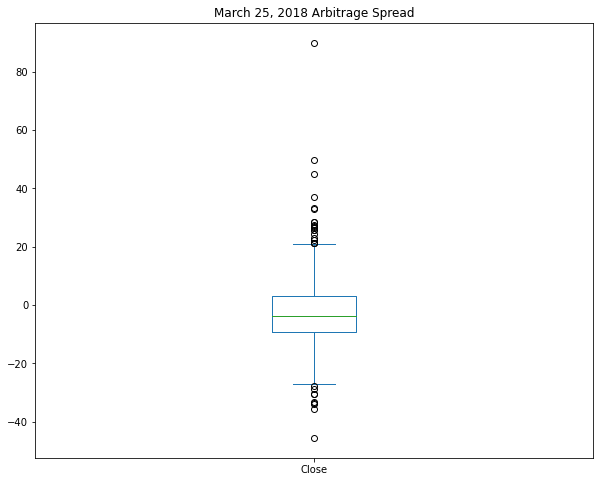

In [148]:
# same process for boxplot from cell 25
arbitrage_spread_late.plot(kind = 'box', title = 'March 25, 2018 Arbitrage Spread', figsize = (10,8)) 

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [203]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one


early_arbit = coinbase_sliced['Close'].loc['2018-01-16'] - bitstamp_sliced['Close'].loc['2018-01-16'] 

middle_arbit = coinbase_sliced['Close'].loc['2018-02-22'] - bitstamp_sliced['Close'].loc['2018-02-22'] 

late_arbit = coinbase_sliced['Close'].loc['2018-03-29'] - bitstamp_sliced['Close'].loc['2018-03-29'] 







#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [204]:
early_return = early_arbit[early_arbit > 0] / bitstamp_sliced['Close'].loc['2018-01-16']
early_return

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
                         ...   
2018-01-16 23:55:00    0.000546
2018-01-16 23:56:00         NaN
2018-01-16 23:57:00    0.002153
2018-01-16 23:58:00         NaN
2018-01-16 23:59:00         NaN
Name: Close, Length: 1440, dtype: float64

In [205]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
middle_return = middle_arbit[middle_arbit > 0] / bitstamp_sliced['Close'].loc['2018-02-22']
middle_return

Timestamp
2018-02-22 00:00:00   NaN
2018-02-22 00:01:00   NaN
2018-02-22 00:02:00   NaN
2018-02-22 00:03:00   NaN
2018-02-22 00:04:00   NaN
                       ..
2018-02-22 23:55:00   NaN
2018-02-22 23:56:00   NaN
2018-02-22 23:57:00   NaN
2018-02-22 23:58:00   NaN
2018-02-22 23:59:00   NaN
Name: Close, Length: 1440, dtype: float64

In [194]:
late_return = late_arbit[late_arbit > 0] / bitstamp_sliced['Close'].loc['2018-03-29'] 
late_return

Timestamp
2018-03-29 00:00:00         NaN
2018-03-29 00:01:00         NaN
2018-03-29 00:02:00         NaN
2018-03-29 00:03:00         NaN
2018-03-29 00:04:00         NaN
                         ...   
2018-03-29 23:55:00    0.002500
2018-03-29 23:56:00    0.002277
2018-03-29 23:57:00    0.002660
2018-03-29 23:58:00    0.001873
2018-03-29 23:59:00    0.002815
Name: Close, Length: 1440, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [195]:
profitable_trades_early = early_return[early_return > 0.01]
profitable_trades_early.head(10)

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
2018-01-16 03:08:00    0.017190
2018-01-16 03:09:00    0.022272
2018-01-16 03:10:00    0.012113
2018-01-16 03:13:00    0.012448
2018-01-16 03:37:00    0.022270
Name: Close, dtype: float64

In [196]:
profitable_trades_middle = middle_return[middle_return > 0.01]
profitable_trades_middle.head(10)

Series([], Name: Close, dtype: float64)

In [197]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = late_return[late_return > 0.01]
profitable_trades_late
# Review the first five profitable trades
# YOUR CODE HERE

Timestamp
2018-03-29 17:11:00    0.012566
Name: Close, dtype: float64

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [198]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
profitable_trades_early.describe(include='all') 

count    73.000000
mean      0.016720
std       0.007628
min       0.010109
25%       0.012061
50%       0.014794
75%       0.018124
max       0.051633
Name: Close, dtype: float64

In [199]:
profitable_trades_middle.describe(include='all') 

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [200]:
profitable_trades_late.describe(include='all') 
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE

count    1.000000
mean     0.012566
std           NaN
min      0.012566
25%      0.012566
50%      0.012566
75%      0.012566
max      0.012566
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [109]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp_sliced['Close'].loc['2018-01-16'] 
profit_per_trade_early = profit_early.dropna()
profit_per_trade_early

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64

In [160]:
profit_middle = profitable_trades_middle * bitstamp_sliced['Close'].loc['2018-02-16'] 
profit_per_trade_middle = profit_middle.dropna()
profit_per_trade_middle

Series([], Name: Close, dtype: float64)

In [159]:
profit_late = profitable_trades_late * bitstamp_sliced['Close'].loc['2018-03-29'] 
profit_per_trade_late = profit_late.dropna()
profit_per_trade_late

Timestamp
2018-03-29 17:11:00    89.9
Name: Close, dtype: float64

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [161]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.describe()

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64

In [162]:
profit_per_trade_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [165]:
profit_per_trade_late.describe() 

count     1.0
mean     89.9
std       NaN
min      89.9
25%      89.9
50%      89.9
75%      89.9
max      89.9
Name: Close, dtype: float64

<AxesSubplot:title={'center':'January 16, 2018 Profit Per Trade'}, xlabel='Timestamp', ylabel='Profit($)'>

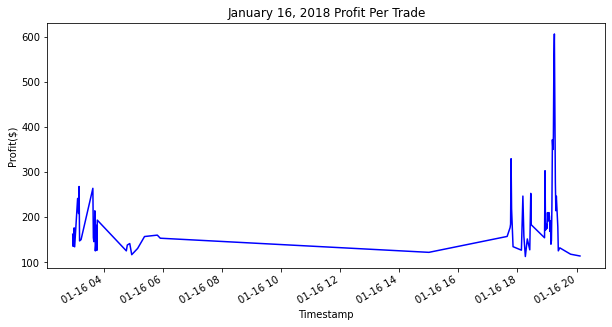

In [213]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(figsize = (10, 5), title = "January 16, 2018 Profit Per Trade", color = "blue", ylabel = "Profit($)") 

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [202]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early


14147.169999999998

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [210]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-16 02:56:00      162.01
2018-01-16 02:57:00      297.01
2018-01-16 02:59:00      473.14
2018-01-16 03:00:00      607.15
2018-01-16 03:06:00      848.69
                         ...   
2018-01-16 19:23:00    13660.06
2018-01-16 19:26:00    13791.84
2018-01-16 19:38:00    13915.85
2018-01-16 19:48:00    14033.48
2018-01-16 20:07:00    14147.17
Name: Close, Length: 73, dtype: float64

In [211]:
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle

Series([], Name: Close, dtype: float64)

In [212]:
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late

Timestamp
2018-03-29 17:11:00    89.9
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Cumulative Bitcoin Profits of 2018-01-16'}, xlabel='Timestamp', ylabel='Profits($)'>

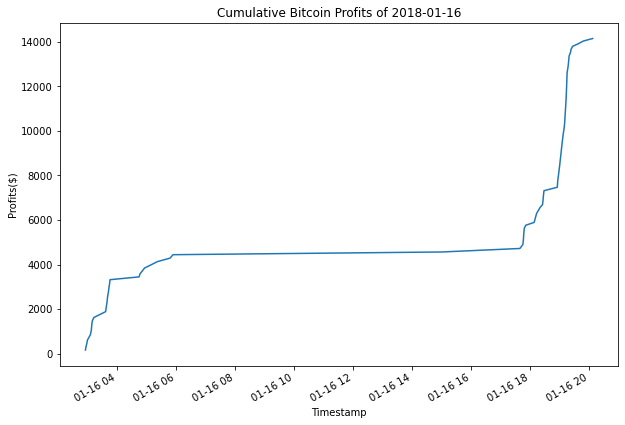

In [214]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early.plot(figsize=(10, 7), title="Cumulative Bitcoin Profits of 2018-01-16", ylabel = "Profits($)")


**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer: 

**There are some notable patterns found between the three time periods. As mentioned in the module, the amount of profitability from arbitrage spread significantly decreased from the first date (73 profitable trades) to the second and third date (1 total profitable trade). This can indicate that from January - April 2018, a high number of arbitrageurs had entered the market, leading to decreases in profitability in spread over the 1% minimum threshold. This also indicates that the best opportunity for arbitrage profits is inversely correlated to the number total arbitrageurs (ie. the early bird gets the worm). 